### 1. Import libraries and read the dataset.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load dataset
house_df = pd.read_csv('kc_house_data.csv')
house_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### 2. Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
house_df['date'] = pd.to_datetime(house_df['date'])

Checked for the column datatypes. Found Date column is of type object. Hence converted it to DateTime data type.

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [6]:
house_df.shape

(21613, 21)

The Dataset contains 21613 record and 21 attributes.

In [7]:
house_df.describe().transpose()

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

The means are almost equal to median for Bedrooms, Bathrooms, sqft_living, floors, condition, sqft_above,yr_built,Zipcode, lat, long and sqft_living15, For the other columns since the means are pulled away from median, we expect outliers to be present.

In [8]:
house_withoutDate = house_df.drop('date',axis=1)

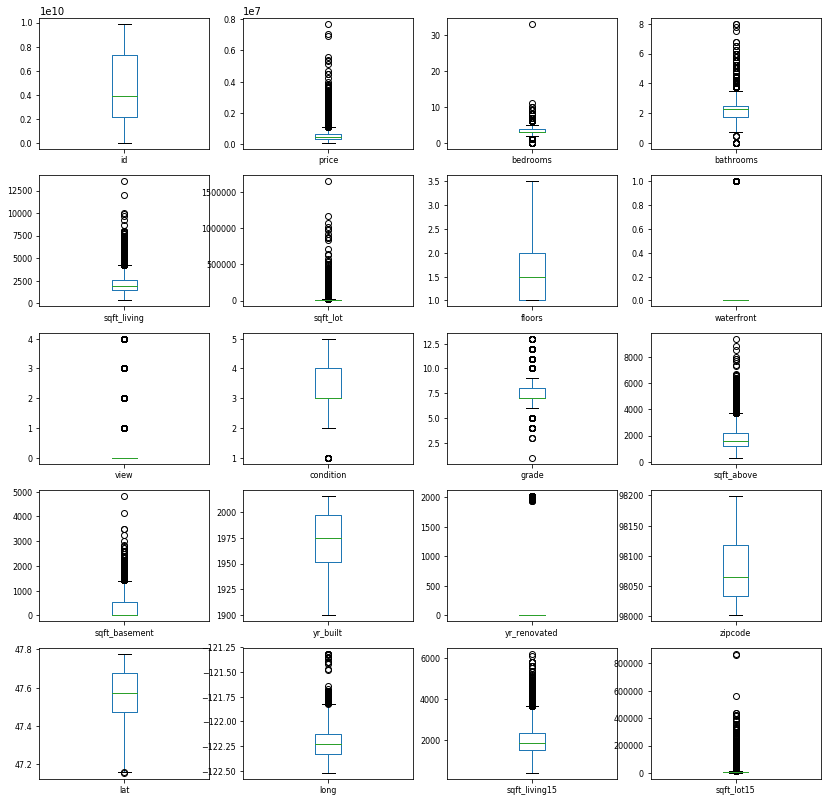

In [9]:
house_withoutDate.plot(kind='box', subplots=True, layout=(5,4), fontsize=8, figsize=(14,14))
plt.show()

From the box plot its evident that we have outliers in most of the columns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


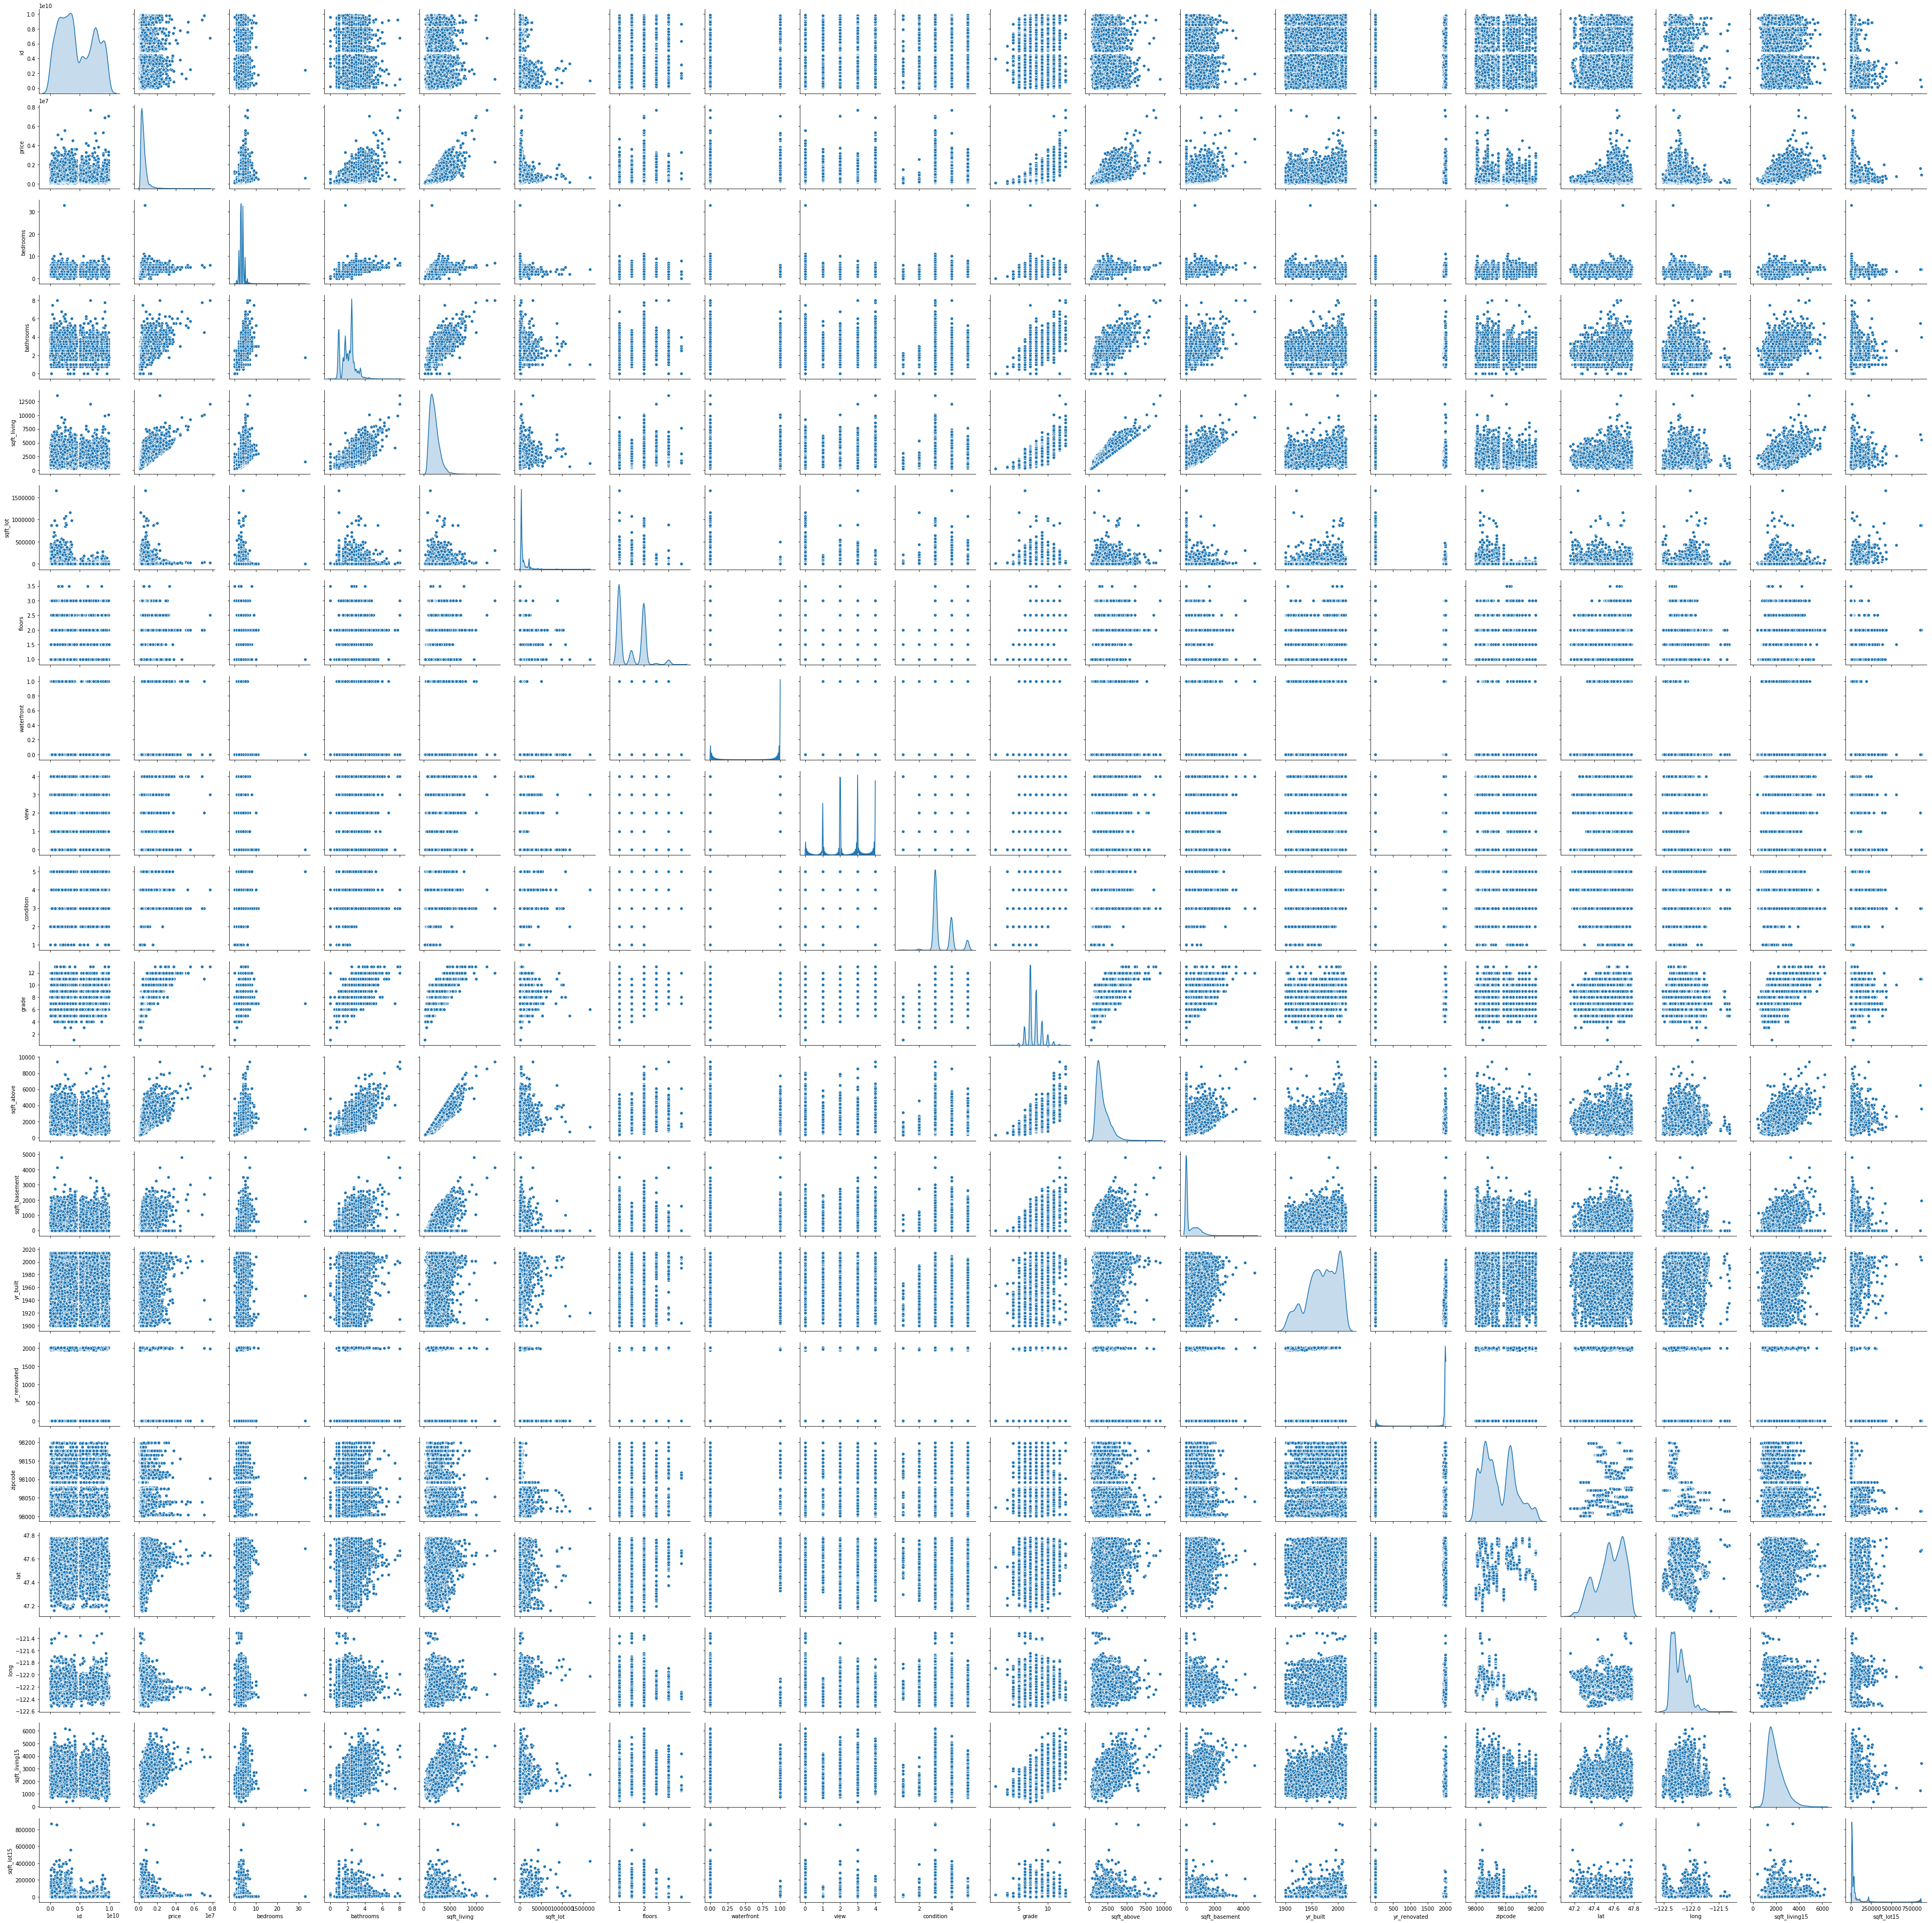

In [10]:
sns.pairplot(house_withoutDate, diag_kind='kde')

1. The pair plot for the price vs price shows that most of the house fall under the lower segment of price range. But the right side long tail states that there are little bit of expensive house as well.
2. The scatter plot for Bedroom, Bathrooms, sqft_living, grade, sqft_above, sqft_living15 vs price states that, as number of bedrooms, Bathroom, sqft_living, grade, sqft_above, sqft_living15 increase, the price of the house also tends to increase upto some extent. After certain level as price increases the no of bedroom is settling to mean of number of bedrooms.
3. For lower price range, you get houses with all number of bedrooms and bathrooms. As price increases, you get more number of bathrooms.
4. The attribute like floors, waterfront, View, condition, sqft_basement,Latitude, sqft_lot15 contribute very less to price of the house. These contribution are not that significant.
5. The attribute like yr_built,sqft_lot, Zipcode, longitude does not contribute towards the predicton of price of the house to that extent.

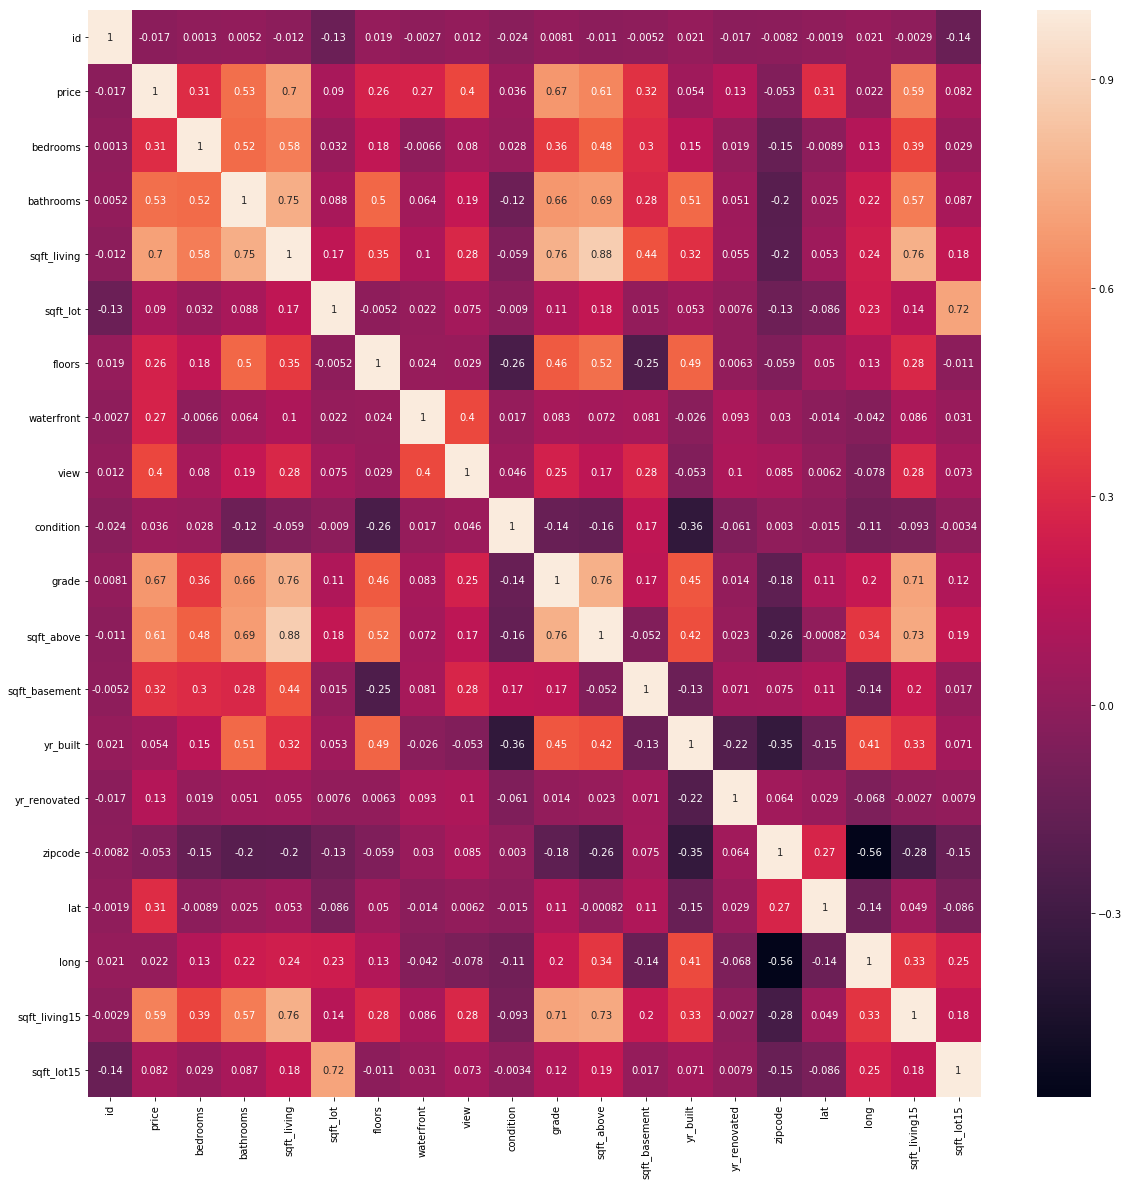

In [11]:
corrmat = house_df.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, annot=True)

We can see that bathrooms, sqft_living, grade, sqft_above, sqft_living15 have good corelation with Price column

### 3. State your insights.

Stated in above question along with the graphs and other data.

### 4. Build a linear regression model to predict the house prices

In [12]:
Y = house_withoutDate['price']

In [13]:
X = house_withoutDate.drop('price',axis=1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [15]:
# bring all the features to same scale
X_train_sd = StandardScaler().fit_transform(x_train)
X_test_sd = StandardScaler().fit_transform(x_test)

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train_sd,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("Train Score:",lr_model.score(X_train_sd,y_train))

Train Score: 0.7041399228662681


In [18]:
y_predict = lr_model.predict(X_test_sd)

In [19]:
print("Test Score:",lr_model.score(X_test_sd,y_test))

Test Score: 0.6869253170361638


In [20]:
print("Test Error:", mean_squared_error(y_test,y_predict))

Test Error: 48861666059.31587


In [21]:
kfold = KFold(n_splits=10,random_state=1)

In [22]:
result = cross_val_score(lr_model,X,Y,scoring='r2',cv=kfold)


In [23]:
print("Mean Squared Error: %.3f (%.3f)"%(result.mean(),result.std()))

Mean Squared Error: 0.695 (0.012)


### 5. Try to find out important features or create new features to improve the performance for your model.

Going by forward selection method and few information from EDA, ill choose the features that had good corelation with Price.

In [24]:
#Model using "bedrooms"
X = house_withoutDate[['bedrooms']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.09507947467657651

In [25]:
#model using "bathrooms"
X = house_withoutDate[['bathrooms']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.27576939959239877

In [26]:
#model using "sqft_living"
X = house_withoutDate[['sqft_living']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.49285321790379316

In [27]:
#model using "floors"
X = house_withoutDate[['floors']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.06594310068341092

In [28]:
#model using "waterfront"
X = house_withoutDate[['waterfront']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.07095267538578331

In [29]:
#model using "view"
X = house_withoutDate[['view']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.15784211584121532

In [30]:
#model using "grade"
X = house_withoutDate[['grade']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.44546848610928713

In [31]:
#model using "sqft_above"
X = house_withoutDate[['sqft_above']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.3667117528382794

In [32]:
#model using "sqft_living15"
X = house_withoutDate[['sqft_living15']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.3426684607560172

In [33]:
X = house_withoutDate[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_living15']]
Y= house_withoutDate[['price']]
Lin_model = LinearRegression()
Lin_model.fit(X,Y)
Lin_model.score(X,Y)

0.5961650661396709

The score did not improve much

Will use SequentialFeatureSelector to choose features - Forward selection Method

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [35]:
Y = house_withoutDate['price']
X = house_withoutDate.drop('price',axis=1)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [37]:
linR = LinearRegression()

In [38]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=10, forward=True, scoring='r2', cv=5)

In [39]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [40]:
sfs1.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.48172529, 0.47655294, 0.45950779, 0.51311425, 0.49573286]),
  'avg_score': 0.48532662632422297,
  'feature_names': ('3',),
  'ci_bound': 0.02325631914079189,
  'std_dev': 0.01809420638513395,
  'std_err': 0.009047103192566975},
 2: {'feature_idx': (3, 15),
  'cv_scores': array([0.57474249, 0.55641323, 0.56062481, 0.58182695, 0.56158553]),
  'avg_score': 0.5670386002514164,
  'feature_names': ('3', '15'),
  'ci_bound': 0.012352390400012637,
  'std_dev': 0.009610579382510377,
  'std_err': 0.004805289691255188},
 3: {'feature_idx': (3, 7, 15),
  'cv_scores': array([0.62213442, 0.6078176 , 0.60256882, 0.61750109, 0.60271175]),
  'avg_score': 0.610546735973412,
  'feature_names': ('3', '7', '15'),
  'ci_bound': 0.010203619439749654,
  'std_dev': 0.007938762574613881,
  'std_err': 0.0039693812873069405},
 4: {'feature_idx': (3, 7, 9, 15),
  'cv_scores': array([0.6505108 , 0.63031248, 0.63843098, 0.64238093, 0.63145168]),
  'avg_score': 0.6386

Build full model with selected features

In [41]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 6, 7, 9, 12, 14, 15, 16]


In [42]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


In [43]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.700


In [45]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.688


Comparing with full model

In [46]:
linR = LinearRegression()
linR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
y_train_pred = linR.predict(x_train)
print('Training accuracy on selected features: %.3f' % linR.score(x_train, y_train))

Training accuracy on selected features: 0.704


In [48]:
y_test_pred = linR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % linR.score(x_test, y_test))

Testing accuracy on selected features: 0.690


No impovement using Forward selection. Let me try out Backward Elimination

In [49]:
sfs1 = sfs(linR, k_features=10, forward=False, scoring='r2', cv=5)

In [50]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [51]:
sfs1.get_metric_dict()

{19: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18),
  'cv_scores': array([0.71796875, 0.68933253, 0.70720825, 0.69854216, 0.70062613]),
  'avg_score': 0.7027355650825621,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18'),
  'ci_bound': 0.012243780561674154,
  'std_dev': 0.009526077238449863,
  'std_err': 0.004763038619224931},
 18: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18),
  'cv_scores': array([0.71796875, 0.68933253, 0.70720825, 0.69854216, 0.70062613]),
  'avg_score': 0.7027355650825646,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18'),
  'ci_bound': 0.01224378056

In [52]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 6, 7, 9, 12, 14, 15, 16]


In [53]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


In [54]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.688


The score is the same. Lets try out Mixed Selection

In [56]:
sfs1 = sfs(linR, k_features=10, forward=True, scoring='r2', cv=5,floating=True)

In [57]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [58]:
sfs1.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.48172529, 0.47655294, 0.45950779, 0.51311425, 0.49573286]),
  'avg_score': 0.48532662632422297,
  'feature_names': ('3',),
  'ci_bound': 0.02325631914079189,
  'std_dev': 0.01809420638513395,
  'std_err': 0.009047103192566975},
 2: {'feature_idx': (3, 15),
  'cv_scores': array([0.57474249, 0.55641323, 0.56062481, 0.58182695, 0.56158553]),
  'avg_score': 0.5670386002514164,
  'feature_names': ('3', '15'),
  'ci_bound': 0.012352390400012637,
  'std_dev': 0.009610579382510377,
  'std_err': 0.004805289691255188},
 3: {'feature_idx': (3, 7, 15),
  'cv_scores': array([0.62213442, 0.6078176 , 0.60256882, 0.61750109, 0.60271175]),
  'avg_score': 0.610546735973412,
  'feature_names': ('3', '7', '15'),
  'ci_bound': 0.010203619439749654,
  'std_dev': 0.007938762574613881,
  'std_err': 0.0039693812873069405},
 4: {'feature_idx': (3, 7, 9, 15),
  'cv_scores': array([0.6505108 , 0.63031248, 0.63843098, 0.64238093, 0.63145168]),
  'avg_score': 0.6386

In [59]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 6, 7, 9, 12, 14, 15, 16]


In [60]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


In [61]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.688


No change in score for mixed mode as well. Let me try to create new feature which were having good corelation with price

In [63]:
house_withoutDate['BathroomsSqft_living'] = house_withoutDate['bathrooms'] * house_withoutDate['sqft_living']
house_withoutDate['BathroomsView'] = house_withoutDate['bathrooms'] * house_withoutDate['view']
house_withoutDate['BathroomsGrade'] = house_withoutDate['bathrooms'] * house_withoutDate['grade']
house_withoutDate['Sqft_livingGrade'] = house_withoutDate['sqft_living'] * house_withoutDate['grade']
house_withoutDate['Sqft_livingSqft_above'] = house_withoutDate['sqft_living'] * house_withoutDate['sqft_above']
house_withoutDate['Sqft_livingsqft_living15'] = house_withoutDate['sqft_living'] * house_withoutDate['sqft_living15']

In [64]:
Y = house_withoutDate['price']

In [65]:
X = house_withoutDate.drop('price',axis=1)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [67]:
linR = LinearRegression()

In [68]:
sfs1 = sfs(linR, k_features=15, forward=True, scoring='r2', cv=5)

In [69]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [70]:
sfs1.get_metric_dict()

{1: {'feature_idx': (22,),
  'cv_scores': array([0.55390265, 0.550205  , 0.53615778, 0.58846009, 0.57799423]),
  'avg_score': 0.5613439494116272,
  'feature_names': ('22',),
  'ci_bound': 0.02456425124709011,
  'std_dev': 0.019111821998586406,
  'std_err': 0.009555910999293203},
 2: {'feature_idx': (15, 22),
  'cv_scores': array([0.63421197, 0.62231387, 0.62551478, 0.64947796, 0.63662579]),
  'avg_score': 0.6336288738881111,
  'feature_names': ('15', '22'),
  'ci_bound': 0.012252579217780113,
  'std_dev': 0.009532922891819564,
  'std_err': 0.004766461445909782},
 3: {'feature_idx': (15, 20, 22),
  'cv_scores': array([0.67193632, 0.67268775, 0.65619585, 0.68082074, 0.67607483]),
  'avg_score': 0.6715430990908342,
  'feature_names': ('15', '20', '22'),
  'ci_bound': 0.010654961062697239,
  'std_dev': 0.00828992169082546,
  'std_err': 0.00414496084541273},
 4: {'feature_idx': (12, 15, 20, 22),
  'cv_scores': array([0.692944  , 0.68840444, 0.68142166, 0.70018601, 0.69566904]),
  'avg_score

In [71]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 20, 22]


In [72]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'BathroomsView', 'Sqft_livingGrade']


In [73]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.747


The score has been increased slightly.

### 6. Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [75]:
CVhouse_df = house_withoutDate.iloc[:,:-6]

In [76]:
CVhouse_df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [77]:
Y = CVhouse_df['price']

In [78]:
X = CVhouse_df.drop('price',axis=1)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

Try with KNN Regressor

In [80]:
#scale the data for KNN
X_train_sd = StandardScaler().fit_transform(x_train)
X_test_sd = StandardScaler().fit_transform(x_test)

In [81]:
model= KNeighborsRegressor(n_neighbors= 5)
params = {'n_neighbors':[5,6,7,8,9,11, 13, 15, 17, 19, 21, 23]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(X_train_sd, y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test_sd)
print('Testing accuracy on selected features: %.3f' % model1.score(X_test_sd, y_test))

Best Hyper Parameters: {'n_neighbors': 7}
Testing accuracy on selected features: 0.768


Try with DecisionTreeRegressor

In [82]:
model= DecisionTreeRegressor(random_state= 5)
#Hyper Parameters Set
params = {'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'max_depth':[5,10,15]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(x_train, y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(x_test)
print('Testing accuracy on selected features: %.3f' % model1.score(x_test, y_test))

Best Hyper Parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Testing accuracy on selected features: 0.775


Try with RandomForestRegressor

In [83]:
model= RandomForestRegressor(random_state= 5)
#Hyper Parameters Set
params = {'n_estimators':[10,15,20,25,30],
          'max_depth': [5, 15, 25, 50], 
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'max_features':[5, 10, 15]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(x_train, y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(x_test)
print('Testing accuracy on selected features: %.3f' % model1.score(x_test, y_test))

Best Hyper Parameters: {'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 30}
Testing accuracy on selected features: 0.859


We could try with SVM regressor (SVR) as well. But my system keeps running and i dont get the output as it is computation intensive. Hence did not try executing below code.

In [ ]:
model= SVR()
#Hyper Parameters Set
params = {'C':[0.001,0.01,0.1,1,10],
          'kernel': ['linear','poly','rbf','sigmoid']}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(x_train, y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(x_test)
print('Testing accuracy on selected features: %.3f' % model1.score(x_test, y_test))

##### Out of all the regression model i have learnt, I found that RandomForest gave the best score of 86% with best hyper parameters : max_depth = 25, max_features = 10, min_samples_leaf = 1, min_samples_split = 6, n_estimators=3